In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import data_cleaning
import matplotlib.pyplot as plt
from data_cleaning import df_from_movie_csv, TABLE_FORMATS
%matplotlib inline

In [31]:
dfs = {}
for table_name in TABLE_FORMATS.keys():
    dfs[table_name] = df_from_movie_csv(table_name)

## Basic dataframe info -- head & info

In [37]:
for df_name,movie_df in dfs.items():
    print(df_name,"\n",movie_df.head())

bom.movie_gross 
                                          title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
imdb.name.basics 
                 primary_name  birth_year  death_year  \
nconst                                                 
nm0061671  Mary Ellen Bauder         NaN         NaN   
nm0061865       Joseph Bauer         NaN         NaN   
nm0062070         Bruce Baum         NaN         NaN   
nm0062195       Axel Baumann         NaN         NaN   
nm0062798        Pete Baxter         NaN    

In [66]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.info())


bom.movie_gross
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

imdb.name.basics
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None

imdb.title.basics
<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     1

In [72]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.describe())


bom.movie_gross
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000

imdb.name.basics
         birth_year   death_year
count  82736.000000  6783.000000
mean    1967.043826  2000.523367
std       22.122190    43.951530
min        1.000000    17.000000
25%     1957.000000  2001.000000
50%     1971.000000  2013.000000
75%     1981.000000  2016.000000
max     2014.000000  2019.000000

imdb.title.basics
          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420

In [ ]:
Limit the years

In [73]:
dfs['tmdb.movies'].release_date.describe()

count                   26517
unique                   3433
top       2010-01-01 00:00:00
freq                      269
first     1930-04-29 00:00:00
last      2020-12-25 00:00:00
Name: release_date, dtype: object

In [76]:
tmdb = dfs['tmdb.movies']
tmdb = tmdb[tmdb.release_date.dt.year > 2009]
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26291 entries, 12444 to 309885
Data columns (total 8 columns):
genre_ids            26291 non-null object
original_language    26291 non-null object
original_title       26291 non-null object
popularity           26291 non-null float64
release_date         26291 non-null datetime64[ns]
title                26291 non-null object
vote_average         26291 non-null float64
vote_count           26291 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


## Distribution of IMDB movie ratings

In [3]:
imdb_title_ratings = dfs['imdb.title.basics'].join(dfs['imdb.title.ratings'])

AttributeError: module 'matplotlib' has no attribute 'set_title'

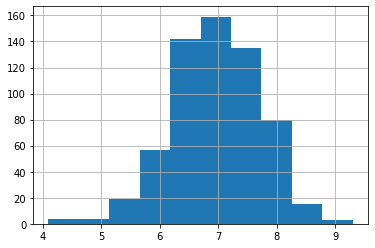

In [29]:
imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)]['averagerating'].hist()
plt.set_title('Average ratings')

In [15]:
from split_data_fields import expand_df_split_fields
title_genres = expand_df_split_fields(dfs['imdb.title.basics'],'imdb.title.basics')

In [41]:
top_movies = imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)].copy()
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, tt0359950 to tt7784604
Data columns (total 7 columns):
primary_title      618 non-null object
original_title     618 non-null object
start_year         618 non-null int64
runtime_minutes    618 non-null float64
genres             618 non-null object
averagerating      618 non-null float64
numvotes           618 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 38.6+ KB


Match most-rated IMDB movies to BOM data based on title. That gives us 520 movies.

In [48]:
imdb_bom_df = top_movies.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [49]:
imdb_bom_df

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000,2016
tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301.0,FoxS,56700000.0,131100000,2013
tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949.0,FoxS,18300000.0,42400000,2010
tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime",6.7,182025.0,Uni.,75600000.0,56300000,2013
tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",7.2,477771.0,Sony,138400000.0,63100000,2012
tt2294449,22 Jump Street,22 Jump Street,2014,112.0,"Action,Comedy,Crime",7.0,319504.0,Sony,191700000.0,139600000,2014
tt1335975,47 Ronin,47 Ronin,2013,128.0,"Action,Adventure,Drama",6.3,135754.0,Uni.,38400000.0,113400000,2013
tt1306980,50/50,50/50,2011,100.0,"Comedy,Drama,Romance",7.7,300475.0,Sum.,35000000.0,4200000,2011
tt1606378,A Good Day to Die Hard,A Good Day to Die Hard,2013,98.0,"Action,Thriller",5.3,188383.0,Fox,67300000.0,237300000,2013


In [50]:
imdb_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, tt1179933 to tt2948356
Data columns (total 11 columns):
index              520 non-null object
original_title     520 non-null object
start_year         520 non-null int64
runtime_minutes    520 non-null float64
genres             520 non-null object
averagerating      520 non-null float64
numvotes           520 non-null float64
studio             520 non-null object
domestic_gross     520 non-null float64
foreign_gross      509 non-null object
year               520 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 48.8+ KB


## Plot top 500 most-rated movies by domestic gross and rating

Text(0, 0.5, 'domestic gross')

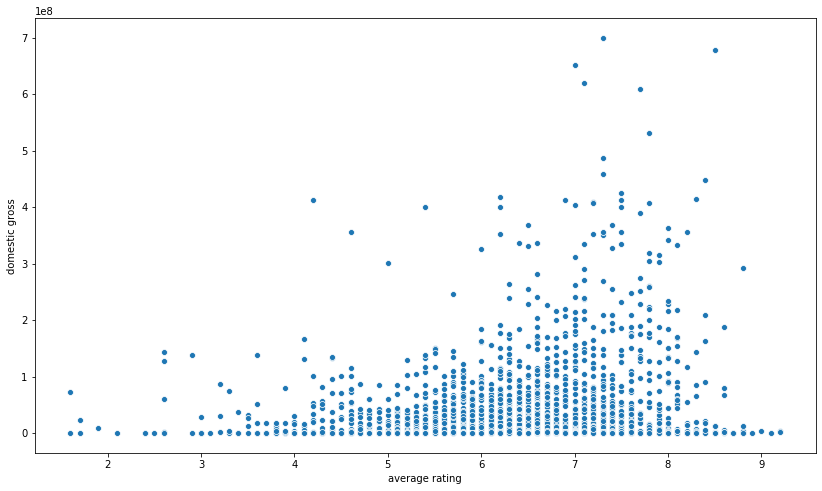

In [91]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
sns.scatterplot(x=imdb_bom_df.averagerating,y=imdb_bom_df.domestic_gross)
ax.set_xlabel('average rating')
ax.set_ylabel('domestic gross')

In [92]:
top_50k = imdb_title_ratings[(imdb_title_ratings.numvotes > 50000)].copy()

In [93]:
imdb_bom_50k = top_50k.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [94]:
imdb_bom_50k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, tt1179933 to tt2948356
Data columns (total 11 columns):
index              860 non-null object
original_title     860 non-null object
start_year         860 non-null int64
runtime_minutes    860 non-null float64
genres             860 non-null object
averagerating      860 non-null float64
numvotes           860 non-null float64
studio             860 non-null object
domestic_gross     860 non-null float64
foreign_gross      798 non-null object
year               860 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 80.6+ KB


In [97]:
imdb_bom_50k[imdb_bom_50k.numvotes < 100000]

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155.0,WB,45800000.0,21600000,2018
tt1436045,13 Assassins,Jûsan-nin no shikaku,2010,141.0,"Action,Adventure,Drama",7.6,58142.0,Magn.,803000.0,16800000,2011
tt2172934,3 Days to Kill,3 Days to Kill,2014,117.0,"Action,Drama,Thriller",6.2,81681.0,Rela.,30700000.0,21900000,2014
tt1622547,30 Minutes or Less,30 Minutes or Less,2011,83.0,"Action,Comedy,Crime",6.1,87254.0,Sony,37100000.0,3500000,2011
tt4731136,A Cure for Wellness,A Cure for Wellness,2016,146.0,"Drama,Fantasy,Horror",6.4,70941.0,Fox,8100000.0,18500000,2017
tt1571222,A Dangerous Method,A Dangerous Method,2011,99.0,"Biography,Drama,Romance",6.4,93259.0,SPC,5700000.0,21800000,2011
tt1753383,A Dog's Purpose,A Dog's Purpose,2017,100.0,"Adventure,Comedy,Drama",7.1,53805.0,Uni.,64500000.0,140500000,2017
tt3416532,A Monster Calls,A Monster Calls,2016,108.0,"Animation,Drama,Fantasy",7.5,70416.0,Focus,3700000.0,43600000,2016
tt2937898,A Most Violent Year,A Most Violent Year,2014,125.0,"Crime,Drama,Thriller",7.0,60165.0,A24,5700000.0,6300000,2014


In [105]:
pd.set_option('display.max_rows',100)
imdb_bom_50k.groupby('studio').count().sort_values(by='index',ascending=False)

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
studio,,,,,,,,,,
Uni.,100,100,100,100,100,100,100,100,100,100
Fox,84,84,84,84,84,84,84,84,83,84
WB,83,83,83,83,83,83,83,83,82,83
BV,63,63,63,63,63,63,63,63,63,63
Par.,56,56,56,56,56,56,56,56,56,56
Sony,54,54,54,54,54,54,54,54,54,54
LGF,39,39,39,39,39,39,39,39,36,39
WB (NL),33,33,33,33,33,33,33,33,33,33
Wein.,31,31,31,31,31,31,31,31,29,31


Is it easy to filter out foreign studios? We could look only at the most prolific studios or not worry about it. 

Match all the IMDB movies to BoxOfficeMojo set.

In [53]:
imdb_bom_df_big = imdb_title_ratings.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [54]:
imdb_bom_df_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3366 entries, tt2614684 to tt2948356
Data columns (total 11 columns):
index              3366 non-null object
original_title     3366 non-null object
start_year         3366 non-null int64
runtime_minutes    3198 non-null float64
genres             3326 non-null object
averagerating      3027 non-null float64
numvotes           3027 non-null float64
studio             3363 non-null object
domestic_gross     3342 non-null float64
foreign_gross      2043 non-null object
year               3366 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 315.6+ KB


In [58]:
imdb_bom_df_big[~(imdb_bom_df_big.start_year == imdb_bom_df_big.year)]

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000,2015
tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848.0,FM,53900.0,NaN,2014
tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,NaN,2012
tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301.0,KL,11000.0,NaN,2015
tt1436045,13 Assassins,Jûsan-nin no shikaku,2010,141.0,"Action,Adventure,Drama",7.6,58142.0,Magn.,803000.0,16800000,2011
tt1442571,14 Blades,Jin yi wei,2010,114.0,"Action,History,Thriller",6.4,7100.0,RTWC,NaN,3800000,2014
tt1860152,17 Girls,17 filles,2011,86.0,Drama,6.0,2980.0,Strand,15100.0,186000,2012
tt2871116,"2 Autumns, 3 Winters",2 automnes 3 hivers,2013,91.0,Comedy,6.7,582.0,FM,5800.0,NaN,2014
tt1167638,22 Bullets,L'immortel,2010,117.0,"Action,Crime,Drama",6.7,30360.0,Cdgm.,NaN,21300000,2013


In [108]:
imdb_bom_df_big[(imdb_bom_df_big.numvotes>20000) & (imdb_bom_df_big.numvotes<50000)]

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000,2015
tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,NaN,2012
tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller",6.3,29550.0,RTWC,13800.0,NaN,2014
tt2372678,2 States,2 States,2014,149.0,"Comedy,Drama,Romance",6.9,21715.0,UTV,2200000.0,NaN,2014
tt4385888,20th Century Women,20th Century Women,2016,119.0,"Comedy,Drama",7.3,32057.0,A24,5700000.0,NaN,2016
tt1167638,22 Bullets,L'immortel,2010,117.0,"Action,Crime,Drama",6.7,30360.0,Cdgm.,NaN,21300000,2013
tt3544082,45 Years,45 Years,2015,91.0,"Drama,Romance",7.1,27914.0,IFC,4200000.0,NaN,2015
tt2932536,47 Meters Down,47 Meters Down,2017,89.0,"Adventure,Drama,Horror",5.6,39060.0,ENTMP,44300000.0,NaN,2017
tt1179069,6 Souls,6 Souls,2010,112.0,"Horror,Mystery,Thriller",6.1,30389.0,RTWC,NaN,852000,2013


### Filtering by studios that have grossed at least a million dollars in the Box Office Mojo data.

In [117]:
df = imdb_bom_df_big.copy()
df['ct'] = 1
pd.set_option('display.max_rows',300)
studios = df.groupby('studio').sum().sort_values(by='domestic_gross',ascending=False).query('domestic_gross > 1000000')

In [121]:
studios.ct.sum()

3158

In [122]:
studios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, BV to Asp.
Data columns (total 7 columns):
start_year         122 non-null int64
runtime_minutes    122 non-null float64
averagerating      122 non-null float64
numvotes           122 non-null float64
domestic_gross     122 non-null float64
year               122 non-null int64
ct                 122 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.6+ KB


In [123]:
studios.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year,ct
count,122.000000,122.000000,122.000000,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,52132.196721,2587.778689,150.084426,1.520713e+06,8.179629e+08,52134.508197,25.885246
std,76233.063464,3765.360665,217.640096,3.965894e+06,2.824110e+09,76233.689925,37.853829
min,2010.000000,41.000000,4.300000,3.640000e+02,1.041000e+06,2010.000000,1.000000
25%,4535.750000,231.750000,13.925000,3.768625e+04,3.039349e+06,4536.000000,2.250000
50%,16125.500000,820.000000,49.050000,1.404745e+05,1.360000e+07,16125.500000,8.000000
75%,53407.500000,2754.750000,147.550000,5.760788e+05,1.048432e+08,53428.500000,26.500000
max,366608.000000,17466.000000,970.500000,2.172688e+07,1.919390e+10,366551.000000,182.000000


In [129]:
imdb_bom_top_studios_df = imdb_bom_df_big[imdb_bom_df_big.studio.isin(list(studios.index))]

In [130]:
imdb_bom_top_studios_df

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103.0,RAtt.,1300000.0,355000,2015
tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848.0,FM,53900.0,NaN,2014
tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000,2016
tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484.0,Anch.,203000.0,NaN,2012
tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301.0,KL,11000.0,NaN,2015
tt6580564,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",7.5,4802.0,Sony,1300000.0,10900000,2018
tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155.0,WB,45800000.0,21600000,2018
tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301.0,FoxS,56700000.0,131100000,2013
tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949.0,FoxS,18300000.0,42400000,2010


In [134]:
df = imdb_bom_top_studios_df
df[df.duplicated(subset='original_title',keep=False)]

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt1306980,50/50,50/50,2011,100.0,"Comedy,Drama,Romance",7.7,300475.0,Sum.,35000000.0,4200000,2011
tt1734060,50/50,50/50,2010,77.0,Documentary,7.5,11.0,Sum.,35000000.0,4200000,2011
tt5613834,A Gentleman,A Gentleman,2017,145.0,"Action,Comedy",6.3,4188.0,FIP,410000.0,2500000,2017
tt8289324,A Gentleman,A Gentleman,2018,70.0,Drama,NaN,NaN,FIP,410000.0,2500000,2017
tt3577624,A Perfect Day,A Perfect Day,2015,106.0,"Comedy,Drama,War",6.8,18190.0,IFC,14000.0,1700000,2016
tt7785272,A Perfect Day,A Perfect Day,2015,82.0,Drama,NaN,NaN,IFC,14000.0,1700000,2016
tt6347308,A Quiet Place,A Quiet Place,2016,80.0,Documentary,6.6,18.0,Par.,188000000.0,152900000,2018
tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",7.6,305031.0,Par.,188000000.0,152900000,2018
tt1603257,ATM,ATM,2012,90.0,"Horror,Thriller",4.7,21608.0,IFC,3000.0,NaN,2012


In [16]:
title_genre_ratings = title_genres.join(dfs['imdb.title.ratings'])

In [21]:
title_genre_ratings[(title_genre_ratings.numvotes > 100000) & (title_genre_ratings.genre == 'Action')] \
                   .averagerating.hist(by=title_genre_ratings['genre'])

ValueError: cannot reindex from a duplicate axis

This actually sort of appears to work:

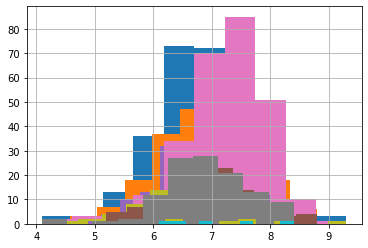

In [26]:
title_genre_ratings[title_genre_ratings.numvotes > 100000].groupby('genre').averagerating.hist();